In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
import re
import cv2

%matplotlib inline

In [50]:
results_dir = './results'
data_dir = 'data'
results = [name for name in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, name))]

In [165]:
def scale_box(pd, im):
    predict_im_size = 832.
    
    # Vertical is stretched by 
    im_height, im_width, _ = im.shape
    width_scale = im_width / predict_im_size
    height_scale = im_height / predict_im_size
    scale_diff = (predict_im_size - (im_height / width_scale)) / 2.
    
    pd.iloc[:,[1,3]] = np.round(pd.iloc[:,[1,3]] * width_scale)
    pd.iloc[:,[2,4]] = np.round((pd.iloc[:,[2,4]] - scale_diff) * width_scale)
    pd.iloc[:,3] = pd.iloc[:,3] - pd.iloc[:,1]
    pd.iloc[:,4] = pd.iloc[:,4] - pd.iloc[:,2]
    
    return pd

In [187]:
def show_image(im):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.] )
    ax.set_axis_off( )
    fig.add_axes(ax)
    
    ax.imshow(im)
    return ax

In [198]:
def produce_image(result_csv_path, bounding_box = True, truth = False, data_dir = 'data'):
    
    
    image_file = result.split('.')[0]
    video_id = re.search('.*(?=(_clip))', image_file).group(0)
    clip_id = re.search('clip_[0-9]{2}', image_file).group(0)
    frame_number = image_file[-2:]
    
    image_path = os.path.join(data_dir, video_id, clip_id, frame_number + '.png')
    im = mpimg.imread(image_path)
    
    ax = show_image(im)

    if bounding_box == True:
        csv_file = pd.read_csv(result_csv_path, header = None)
        fixed_pd = scale_box(csv_file, im)
        counter = 0
        for _, bbox in fixed_pd.iterrows():
            counter = counter + 1
            rect = patches.Rectangle((bbox[1], bbox[2]), bbox[3], bbox[4], linewidth = 3, fill = False)
            ax.add_patch(rect)
        
    if truth is True:
        bbox_data_path = os.path.join(data_dir, video_id, clip_id, frame_number + '_info.csv')
        bbox_data = pd.read_csv(bbox_data_path)
        
        for _, bbox in bbox_data.iterrows():
            rect = patches.Rectangle((bbox.x, bbox.y), bbox.w, bbox.h, linewidth = 3, fill = False, color = 'yellow')
            ax.add_patch(rect)
        

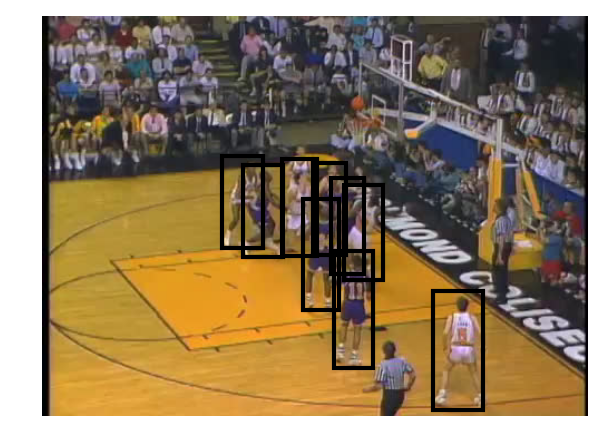

In [203]:
skip_counter = 0
for result in results:
    skip_counter = skip_counter + 1
    if skip_counter < 17:
        continue
    csv_path = os.path.join(results_dir, result)
    produce_image(csv_path, True)
    break # REMOVE

In [200]:
print scale_box(csv_file, im)

          0      1     2      3     4
0  0.607711   98.0   0.0  -77.0 -18.0
1  0.649756  118.0   8.0  -99.0 -26.0
2  0.724124  192.0  17.0 -173.0 -27.0
3  0.758114  147.0  35.0 -125.0 -49.0
4  0.746498  169.0  33.0 -150.0 -48.0
5  0.620974   95.0  35.0  -77.0 -41.0
6  0.666952  110.0  37.0  -91.0 -45.0
7  0.703751  186.0  40.0 -165.0 -51.0
8  0.740723  164.0  65.0 -142.0 -76.0
